In [1]:
# extend the width of the notebook cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
display(HTML("<style>.output_result { width:95% !important; }</style>"))

In [2]:
# autoreload allows changes to modules on the fly (no need for reloading them after a change in the code)
%load_ext autoreload
%autoreload 2

In [3]:
from MyModules import *

Welcome to JupyROOT 6.24/06


In [4]:
torch.manual_seed(0)
np.random.seed(0)

In [5]:
plt.rcParams["figure.figsize"] = [12, 8]

In [6]:
# set up target functions
target_function_1 = lambda a :a
target_function_2 = lambda a :np.ones_like(a)
target_function_3 = lambda a :np.sum(a, axis=1)

In [7]:
# generate a training dataset
x_train, y_train, input_nfeatures, target_nfeatures = data_generation(
    n_data=1000,
    input_nfeatures=3,
    data_range=[0,1],
    target_function=target_function_3
)

1


# fit linear and constant function

In [8]:
data_k = data_generation(
    n_data=1,
    input_nfeatures=1,
    data_range=[20,30],
    target_function=target_function_1
)
print(data_k[0].shape)
print(data_k[1].shape)

1
torch.Size([1, 1])
torch.Size([1, 1])


In [9]:
data_d = data_generation(
    n_data=10000,
    input_nfeatures=1,
    data_range=[0,1],
    target_function=target_function_2
)
print(data_d[0].shape)
print(data_d[1].shape)

1
torch.Size([10000, 1])
torch.Size([10000, 1])


In [10]:
def loss_k(x,k):
    return ((x*(1-k))**2).mean(axis=0)

In [11]:
def loss_d(x,d):
    return ((np.ones_like(x)-d)**2).mean(axis=0)

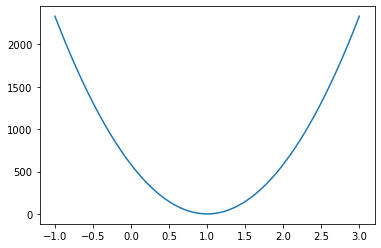

In [12]:
# plot loss function with fixed data wrt k
x_plot = np.linspace(-1,3,1000)
plt.plot(x_plot,loss_k(data_k[0].numpy(),x_plot))
plt.show()

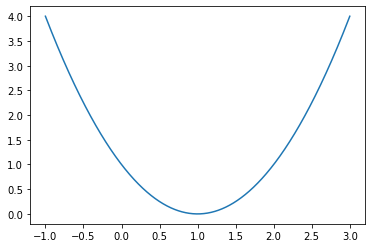

In [13]:
# plot loss fn wrt d
x_plot = np.linspace(-1,3,1000)
plt.plot(x_plot,loss_d(data_d[0].numpy(),x_plot))
plt.show()

In [14]:
# create a model to fit linear function
model_k = nn.Linear(data_k[2], data_k[3], bias=False)
for p in model_k.named_parameters():
    print(p)

('weight', Parameter containing:
tensor([[-0.0075]], requires_grad=True))


In [15]:
# create model to fit constant function
model_d = nn.Linear(data_d[2], data_d[3], bias=True)
for name,param in model_d.named_parameters():
    if name=='weight':
        param.requires_grad=False
        param.data.fill_(0.)
    print(name, param)

weight Parameter containing:
tensor([[0.]])
bias Parameter containing:
tensor([-0.8230], requires_grad=True)


x: -1.0, loss: 2330.885986328125, grad: tensor([[-2330.8860]])
x: -0.7894736842105263, loss: 1866.00048828125, grad: tensor([[-2085.5298]])
x: -0.5789473684210527, loss: 1452.7681884765625, grad: tensor([[-1840.1731]])
x: -0.368421052631579, loss: 1091.1905517578125, grad: tensor([[-1594.8169]])
x: -0.1578947368421053, loss: 781.2665405273438, grad: tensor([[-1349.4603]])
x: 0.05263157894736836, loss: 522.9966430664062, grad: tensor([[-1104.1040]])
x: 0.26315789473684204, loss: 316.3806457519531, grad: tensor([[-858.7475]])
x: 0.4736842105263157, loss: 161.418701171875, grad: tensor([[-613.3911]])
x: 0.6842105263157894, loss: 58.1107292175293, grad: tensor([[-368.0346]])
x: 0.894736842105263, loss: 6.456750869750977, grad: tensor([[-122.6782]])
x: 1.1052631578947367, loss: 6.456740856170654, grad: tensor([[122.6781]])
x: 1.3157894736842106, loss: 58.1107292175293, grad: tensor([[368.0346]])
x: 1.526315789473684, loss: 161.41871643066406, grad: tensor([[613.3911]])
x: 1.7368421052631575

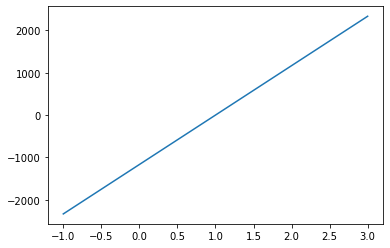

In [16]:
# plot gradients of model_k
plot_gradients(model_k, data_k[0], target_function_1)

x: -1.0, loss: 6.299648761749268, grad: tensor([-4.9866])
x: -0.7894736842105263, loss: 4.799488544464111, grad: tensor([-4.3578])
x: -0.5789473684210527, loss: 3.5043656826019287, grad: tensor([-3.7291])
x: -0.368421052631579, loss: 2.4142799377441406, grad: tensor([-3.1003])
x: -0.1578947368421053, loss: 1.5292311906814575, grad: tensor([-2.4716])
x: 0.05263157894736836, loss: 0.8492193222045898, grad: tensor([-1.8428])
x: 0.26315789473684204, loss: 0.3742445409297943, grad: tensor([-1.2141])
x: 0.4736842105263157, loss: 0.10430686175823212, grad: tensor([-0.5853])
x: 0.6842105263157894, loss: 0.03940621018409729, grad: tensor([0.0434])
x: 0.894736842105263, loss: 0.17954258620738983, grad: tensor([0.6722])
x: 1.1052631578947367, loss: 0.5247159004211426, grad: tensor([1.3010])
x: 1.3157894736842106, loss: 1.074926495552063, grad: tensor([1.9297])
x: 1.526315789473684, loss: 1.8301739692687988, grad: tensor([2.5585])
x: 1.7368421052631575, loss: 2.7904586791992188, grad: tensor([3.18

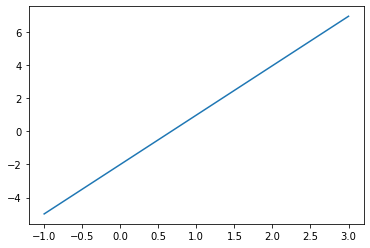

In [17]:
# plot gradients of model_d
plot_gradients(model_d, data_d[0], lambda a: torch.from_numpy(target_function_2(a)))

('weight', Parameter containing:
tensor([[-0.3852]], requires_grad=True))
epoch: 0, Loss: 1118.0401611328125, lr: 0.001
epoch: 1, Loss: 30.602344512939453, lr: 0.001
epoch: 2, Loss: 0.8376281261444092, lr: 0.001
epoch: 3, Loss: 0.022927040234208107, lr: 0.001
epoch: 4, Loss: 0.0006274629267863929, lr: 0.001
epoch: 5, Loss: 1.7178277630591765e-05, lr: 0.001
epoch: 6, Loss: 4.71482053399086e-07, lr: 0.001
epoch: 7, Loss: 1.3096723705530167e-08, lr: 0.001
epoch: 8, Loss: 3.637978807091713e-10, lr: 0.001
epoch: 9, Loss: 1.4551915228366852e-11, lr: 0.001
epoch: 10, Loss: 3.637978807091713e-12, lr: 0.001
epoch: 11, Loss: 0.0, lr: 0.001
epoch: 12, Loss: 0.0, lr: 0.001
epoch: 13, Loss: 0.0, lr: 0.001
epoch: 14, Loss: 0.0, lr: 0.001
epoch: 15, Loss: 0.0, lr: 0.001
epoch: 16, Loss: 0.0, lr: 0.001
epoch: 17, Loss: 0.0, lr: 0.001
epoch: 18, Loss: 0.0, lr: 0.001
epoch: 19, Loss: 0.0, lr: 0.001
epoch: 20, Loss: 0.0, lr: 0.001
epoch: 21, Loss: 0.0, lr: 0.001
epoch: 22, Loss: 0.0, lr: 0.001
epoch: 23,

epoch: 800, Loss: 0.0, lr: 0.001
epoch: 801, Loss: 0.0, lr: 0.001
epoch: 802, Loss: 0.0, lr: 0.001
epoch: 803, Loss: 0.0, lr: 0.001
epoch: 804, Loss: 0.0, lr: 0.001
epoch: 805, Loss: 0.0, lr: 0.001
epoch: 806, Loss: 0.0, lr: 0.001
epoch: 807, Loss: 0.0, lr: 0.001
epoch: 808, Loss: 0.0, lr: 0.001
epoch: 809, Loss: 0.0, lr: 0.001
epoch: 810, Loss: 0.0, lr: 0.001
epoch: 811, Loss: 0.0, lr: 0.001
epoch: 812, Loss: 0.0, lr: 0.001
epoch: 813, Loss: 0.0, lr: 0.001
epoch: 814, Loss: 0.0, lr: 0.001
epoch: 815, Loss: 0.0, lr: 0.001
epoch: 816, Loss: 0.0, lr: 0.001
epoch: 817, Loss: 0.0, lr: 0.001
epoch: 818, Loss: 0.0, lr: 0.001
epoch: 819, Loss: 0.0, lr: 0.001
epoch: 820, Loss: 0.0, lr: 0.001
epoch: 821, Loss: 0.0, lr: 0.001
epoch: 822, Loss: 0.0, lr: 0.001
epoch: 823, Loss: 0.0, lr: 0.001
epoch: 824, Loss: 0.0, lr: 0.001
epoch: 825, Loss: 0.0, lr: 0.001
epoch: 826, Loss: 0.0, lr: 0.001
epoch: 827, Loss: 0.0, lr: 0.001
epoch: 828, Loss: 0.0, lr: 0.001
epoch: 829, Loss: 0.0, lr: 0.001
epoch: 830

/users/oskar.rothbacher/CMS/ML-pytorch/Oskar/MyModules.py:139: RuntimeWarning: invalid value encountered in true_divide
  rel_loss_decrease = np.array(losses[1:])/np.array(losses[:-1])


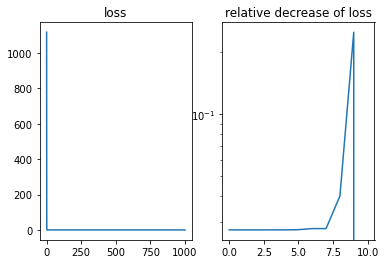

In [19]:
#re init model_k and train
model_k = nn.Linear(data_k[2], data_k[3], bias=False)
for p in model_k.named_parameters():
    print(p)
    
learn(model=model_k,
      x_train=data_k[0],
      y_train=data_k[1],
      n_epoch=1000, 
      learning_rate=1e-3,
      plot_every=1,
      scheduler=None)

# lets try the sum

In [32]:
data_sum = data_generation(
    n_data=100000,
    input_nfeatures=10,
    data_range=[-1,1],
    target_function=target_function_3
)
print(data_sum[0].shape)
print(data_sum[1].shape)

1
torch.Size([100000, 10])
torch.Size([100000, 1])


MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=10, out_features=10, bias=False)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=False)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=False)
  )
)
epoch: 0, Loss: 3.3213460445404053, lr: 0.1
epoch: 1000, Loss: 0.0006356671219691634, lr: 0.1
epoch: 2000, Loss: 0.00019954709568992257, lr: 0.1
epoch: 3000, Loss: 0.00010476676106918603, lr: 0.1
epoch: 4000, Loss: 6.761005352018401e-05, lr: 0.1
epoch: 5000, Loss: 4.840709516429342e-05, lr: 0.1
epoch: 6000, Loss: 3.676589403767139e-05, lr: 0.1
epoch: 7000, Loss: 2.908704300352838e-05, lr: 0.1
epoch: 8000, Loss: 2.3629963834537193e-05, lr: 0.1
epoch: 9000, Loss: 1.9628712834673934e-05, lr: 0.1
epoch: 10000, Loss: 1.658986002439633e-05, lr: 0.1
epoch: 11000, Loss: 1.4213624126568902e-05, lr: 0.1
epoch: 12000, Loss: 1.2297827197471634e-05, lr: 0.1
epoch: 13000, Loss: 1.0748909517133143e-05, lr: 0.1
epoch: 14000, Loss: 9.48143951973179

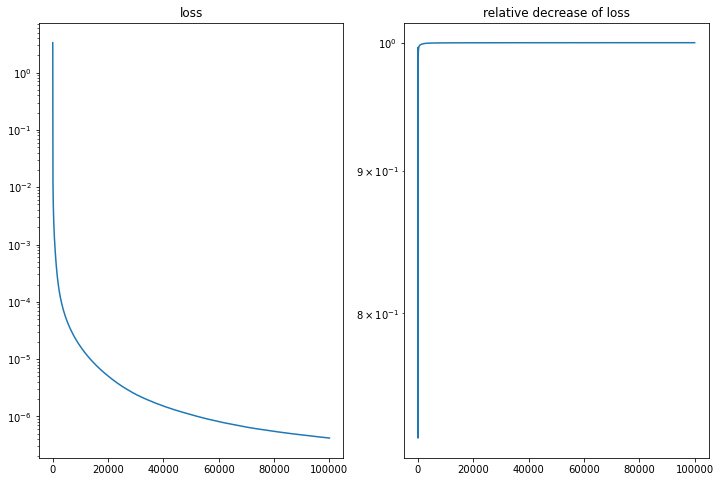

In [30]:
# create model to fit sum and learn
plt.rcParams["figure.figsize"] = [12, 8]
model_sum = MyModule(input_nfeatures=data_sum[2], target_nfeatures=data_sum[3], hidden1=10, hidden2=10)
#model_sum = nn.Linear(data_sum[2], data_sum[3], bias=False)
print(model_sum)
learn(model=model_sum,
      x_train=data_sum[0],
      y_train=data_sum[1],
      n_epoch=100000, 
      learning_rate=1e-1,
      plot_every=1000,
      scheduler=None)

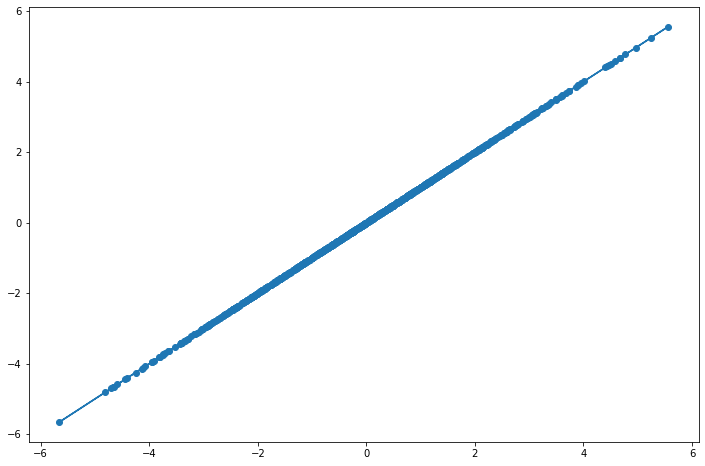

In [33]:

y_pred = model_sum(data_sum[0]).detach().numpy()
plt.scatter(data_sum[1][:1000], y_pred[:1000])
plt.plot(data_sum[1][:1000],data_sum[1][:1000])
plt.show()

In [ ]:
for param in model_sum.parameters():
    print(param.data)

## lets set the weights manually and see...

In [ ]:
for param in model_1.parameters():
    param.data.fill_(1.)

In [ ]:
with torch.no_grad():
    model_1.eval()
    y_train_pred = model_1(x_train)

In [ ]:
for name, param in model_1.named_parameters():
    if param.requires_grad:
        print (name, param.data)

In [ ]:
plt.scatter(y_train[:1000], y_train_pred[:1000])
plt.plot(y_train, y_train)
plt.show()

In [ ]:
[1,2,3]/[1,2,3]

In [ ]:
[a/b for a,b in zip([1,2,3],[2,2,2])]

In [ ]:
l = [0,1,2,3,4,5]

In [ ]:
l[:-1]

In [ ]:
l[1:]